<a href="https://colab.research.google.com/github/alimirash/Linear_Regression_Model_for_Stock_Price_Prediction/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset from a CSV file
url = "/content/sample_data/EURUSD_M1.csv"
columns = ["Date","Open","High","Low","Close","Volume"]
df = pd.read_csv(url, names =columns)

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract 'Date' and 'Close' columns for analysis
x = df['Date']
y = df['Close']

In [ ]:
# Function to plot data
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(10,6), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

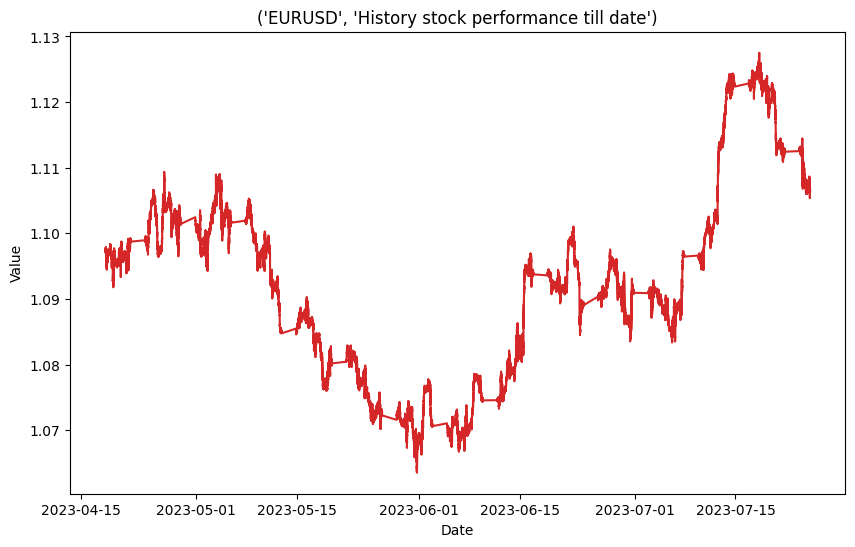

In [ ]:
# Plot the historical stock performance
stock_name= "EURUSD"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [ ]:
# Descriptive statistics of the dataset
df.describe()

,Open,High,Low,Close,Volume
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.092154,1.092221,1.092087,1.092153,221.016110
std,0.014313,0.014316,0.014310,0.014313,198.653445
min,1.063550,1.063590,1.063520,1.063540,1.000000
25%,1.080640,1.080710,1.080580,1.080650,89.000000
50%,1.092110,1.092180,1.092055,1.092110,171.000000
75%,1.100620,1.100680,1.100550,1.100620,292.000000
max,1.127540,1.127560,1.127370,1.127520,2266.000000


In [ ]:
# Prepare the data for linear regression
x = df[['Open']]
y = df['Close']

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

# Create a Linear Regression model and fit it to the training data
regression = LinearRegression()
regression.fit(train_x, train_y)

LinearRegression()

In [ ]:
# Make predictions on the test data
predicted=regression.predict(test_x)

# Create a DataFrame to compare actual and predicted prices
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.tail(10)

,Actual_Price,Predicted_Price
99990,1.10674,1.106558
99991,1.10688,1.106738
99992,1.10686,1.106878
99993,1.10682,1.106848
99994,1.10662,1.106808
99995,1.10642,1.106608
99996,1.10637,1.106418
99997,1.10654,1.106368
99998,1.10645,1.106538
99999,1.10647,1.106448


In [ ]:
# Calculate and print evaluation metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean Absolute Error (MAE):', mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 7.957134432636107e-05
Mean Squared Error (MSE) : 1.5978302093952884e-08
Root Mean Squared Error (RMSE): 0.00012640530880446787


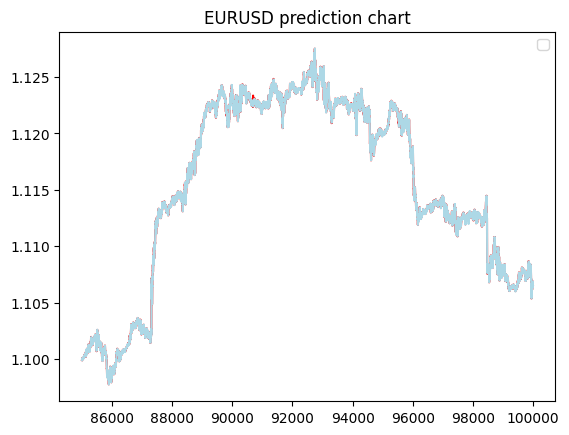

In [ ]:
# Plot actual and predicted prices
plt.plot(dfr.Actual_Price, color='red')
plt.plot(dfr.Predicted_Price, color='lightblue')
plt.title("EURUSD prediction chart")
plt.legend()

In [ ]:
# Initialize variables for prediction

open_value = 1.106448
index = range(0, 30)
predictions = []

# Generate future predictions based on the model
for i in index:
    data = {'Open': open_value}
    df_test = pd.DataFrame(data, index=[i])  # Specify index here
    open_value = regression.predict(df_test)
    predictions.append(open_value)

# Create a DataFrame for the future predictions
df_predictions = pd.DataFrame(predictions, index=index, columns=['Close'])


In [ ]:
# Define a start date for future predictions
start_date = '2023-07-25 09:00:00'
# Generate a date range for the predictions
date_range = pd.date_range(start=start_date, periods=len(df_predictions), freq='1T')  # '1T' stands for 1 minute

# Add the date range as a new column to the DataFrame
df_predictions['Date'] = date_range
df_predictions.set_index('Date', inplace=True)


In [ ]:
# Select a subset of the original data and concatenate it with predictions
sub_df = df[['Date', 'Close']].tail(200).set_index('Date')
concatenated_table = pd.concat([sub_df,df_predictions])


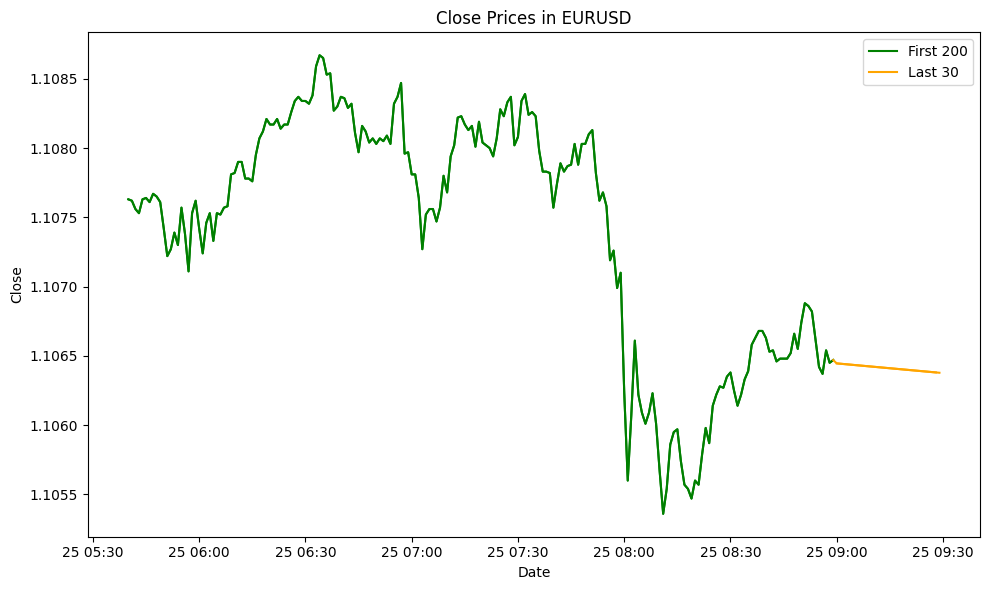

In [ ]:
# Plot the last 200 actual values and the predictions for the next 30 points
plt.figure(figsize=(10, 6))

plt.plot(concatenated_table['Close'][:200], '-', color='green', label='First 200', markersize=6)
plt.plot(concatenated_table['Close'][:200], color='green')

plt.plot(concatenated_table['Close'][-30:], '-', color='orange', label='Last 30', markersize=6)
plt.plot(concatenated_table['Close'][-31:-1], color='orange')

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close Prices in EURUSD')
plt.legend()

plt.tight_layout()
plt.show()